In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [45]:
#loading the dataset

df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [46]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [47]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [49]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse_output=False)
geo_encoder=one_hot_encoder.fit_transform(df[['Geography']])
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [50]:
one_hot_encoder.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [51]:
geo_encoder=pd.DataFrame(geo_encoder,columns=one_hot_encoder.get_feature_names_out())

In [52]:
type(geo_encoder)

pandas.core.frame.DataFrame

In [53]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [54]:
df=df.drop('Geography',axis=1)


In [55]:
df=pd.concat([df,geo_encoder],axis=1)

In [56]:
df['Exited']=df.pop('Exited')

In [57]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,1


In [58]:
#save the encoder and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(encoder,file)
    
with open('oneHot_encoder_gender.pkl','wb') as file:
    pickle.dump(one_hot_encoder,file)

In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X,y

(      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619       0   42       2       0.00              1          1   
 1             608       0   41       1   83807.86              1          0   
 2             502       0   42       8  159660.80              3          1   
 3             699       0   39       1       0.00              2          0   
 4             850       0   43       2  125510.82              1          1   
 ...           ...     ...  ...     ...        ...            ...        ...   
 9995          771       1   39       5       0.00              2          1   
 9996          516       1   35      10   57369.61              1          1   
 9997          709       0   36       7       0.00              1          0   
 9998          772       1   42       3   75075.31              2          1   
 9999          792       0   28       4  130142.79              1          1   
 
       IsActiveMember  EstimatedSalary

In [60]:
#divide the dataset into dependent and independent variables

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [61]:
X_train.shape

(8000, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + transform training data
X_test_scaled = scaler.transform(X_test) 

<Axes: >

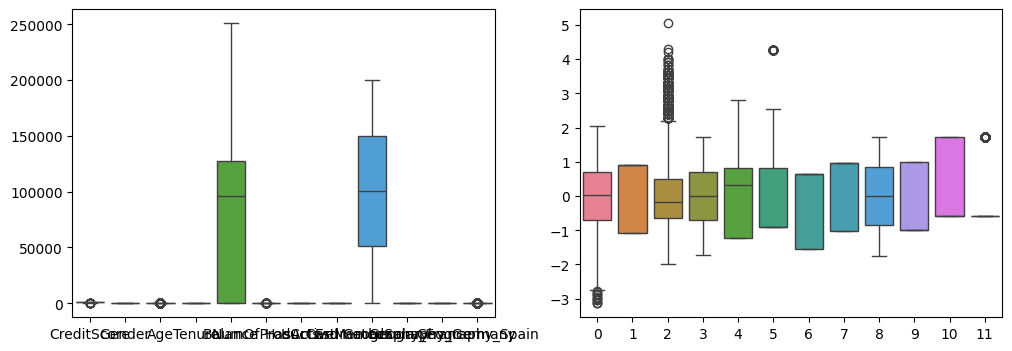

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

In [64]:
with open('StandardScaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [65]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0,1


### ANN Implementation

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [91]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [93]:
## Build ANN model
model= Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/Users/barunwason/python/ANN-classification/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
## defining the optimizers and loss function

opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()

In [96]:
## compile the model

model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [97]:
## Set up the tensorboard

log_dir="log/fit"+datetime.datetime.now().strftime("%y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [98]:
## set up early stopping

ear_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [99]:
##Train the model

History=model.fit(
    X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),
    epochs=100,
    callbacks=[tensorflow_callback,ear_stopping_callback]
    )

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8109 - loss: 0.4383 - val_accuracy: 0.8575 - val_loss: 0.3592
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3466 - val_accuracy: 0.8570 - val_loss: 0.3495
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8563 - loss: 0.3580 - val_accuracy: 0.8605 - val_loss: 0.3505
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3512 - val_accuracy: 0.8605 - val_loss: 0.3441
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8648 - loss: 0.3357 - val_accuracy: 0.8530 - val_loss: 0.3593
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.3472 - val_accuracy: 0.8560 - val_loss: 0.3438
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3340 - val_accuracy: 0.8605 - val_loss: 0.3429
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3383 - val_accu

In [100]:
model.save('model.h5')

In [104]:
## Load tensorboard Extension

%load_ext tensorboard
%tensorboard --logdir log/fit250715-130651

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6010 (pid 94906), started 0:00:01 ago. (Use '!kill 94906' to kill it.)

In [86]:
 %reload_ext tensorboard